<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_inova_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
import math
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

In [149]:
df=pd.read_csv('german_credit.csv',sep=";")

In [150]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,< 0 DM,6,critical account / other credits existing,radio/television,1169,unknown / no savings account,? 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,good
1,0 ? ... < 200 DM,48,existing credits paid till now,radio/television,5951,< 100 DM,1 ? ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,no,yes,bad
2,no checking account,12,critical account / other credits existing,education,2096,< 100 DM,4 ? ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,good
3,< 0 DM,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 ? ... < 7 years,2,male : single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee / official,2,no,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 ? ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,no,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid till now,furniture/equipment,1736,< 100 DM,4 ? ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,good
996,< 0 DM,30,existing credits paid till now,car (used),3857,< 100 DM,1 ? ... < 4 years,4,male : divorced/separated,none,...,building society savings/life insurance,40,none,own,1,management / self-employed / highly qualified,1,"yes, registered under the customer’s name",yes,good
997,no checking account,12,existing credits paid till now,radio/television,804,< 100 DM,? 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee / official,1,no,yes,good
998,< 0 DM,45,existing credits paid till now,radio/television,1845,< 100 DM,1 ? ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customer’s name",yes,bad


In [151]:
df.shape

(1000, 21)

In [152]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,< 0 DM,6,critical account / other credits existing,radio/television,1169,unknown / no savings account,? 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,good
1,0 ? ... < 200 DM,48,existing credits paid till now,radio/television,5951,< 100 DM,1 ? ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,no,yes,bad
2,no checking account,12,critical account / other credits existing,education,2096,< 100 DM,4 ? ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,good
3,< 0 DM,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 ? ... < 7 years,2,male : single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee / official,2,no,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 ? ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,no,yes,bad


In [153]:
df.tail ()

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
995,no checking account,12,existing credits paid till now,furniture/equipment,1736,< 100 DM,4 ? ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,good
996,< 0 DM,30,existing credits paid till now,car (used),3857,< 100 DM,1 ? ... < 4 years,4,male : divorced/separated,none,...,building society savings/life insurance,40,none,own,1,management / self-employed / highly qualified,1,"yes, registered under the customer’s name",yes,good
997,no checking account,12,existing credits paid till now,radio/television,804,< 100 DM,? 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee / official,1,no,yes,good
998,< 0 DM,45,existing credits paid till now,radio/television,1845,< 100 DM,1 ? ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customer’s name",yes,bad
999,0 ? ... < 200 DM,45,critical account / other credits existing,car (used),4576,100 ? ... < 500 DM,unemployed,3,male : single,none,...,car or other,27,none,own,1,skilled employee / official,1,no,yes,good


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status          1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [155]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [156]:
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings,0
employment,0
installment_rate,0
personal_status,0
other_debtors,0


In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
# Contar cuántas columnas categóricas tiene mi DataFrame
num_cat = df.select_dtypes(include=['object', 'category']).shape[1]
print("Número de variables categóricas:", num_cat)

Número de variables categóricas: 14


In [159]:
#Ver mis columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['checking_status', 'credit_history', 'purpose', 'savings', 'employment', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker', 'target']


In [160]:
df[cat_cols].nunique()

,0
checking_status,4
credit_history,5
purpose,10
savings,5
employment,5
personal_status,4
other_debtors,3
property,4
other_installment_plans,3
housing,3


In [161]:
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())


Columna: checking_status
checking_status
no checking account           394
< 0 DM                        274
0 ? ... < 200 DM              269
? 200 DM / salary assigned     63
Name: count, dtype: int64

Columna: credit_history
credit_history
existing credits paid till now               530
critical account / other credits existing    293
delay in paying off in the past               88
all credits at this bank paid duly            49
no credits taken / all paid duly              40
Name: count, dtype: int64

Columna: purpose
purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

Columna: savings
savings
< 100 DM                        603
unknown / no savings account    183
100 ? ... < 500 DM              103
500 ? ... < 1000 DM          

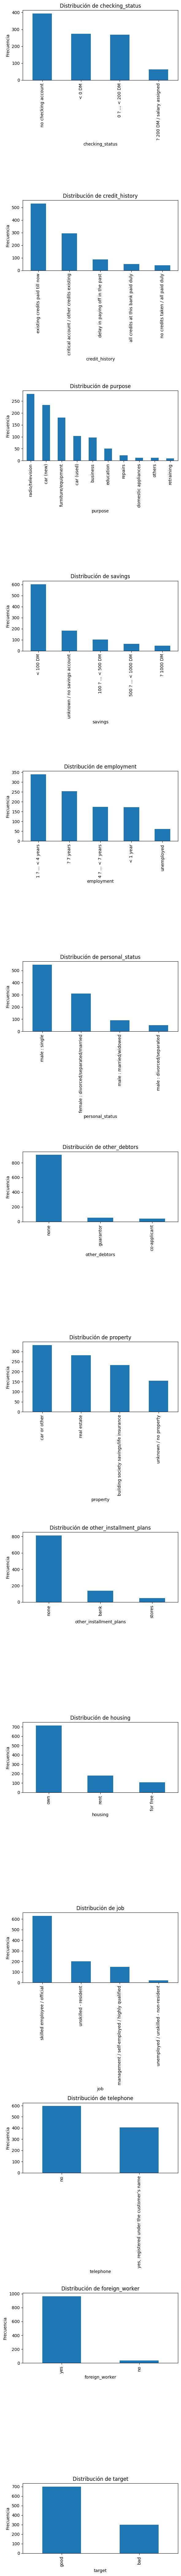

In [162]:
import matplotlib.pyplot as plt

cols_a_graficar = ['checking_status', 'credit_history', 'purpose', 'savings', 'employment', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker', 'target']

# Crear subplots dinámicamente según el número de columnas seleccionadas
fig, axes = plt.subplots(nrows=len(cols_a_graficar), figsize=(6, 6*len(cols_a_graficar)))

# Si hay solo una columna, axes no es iterable
if len(cols_a_graficar) == 1:
    axes = [axes]

# Graficar cada columna seleccionada
for col, ax in zip(cols_a_graficar, axes):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [163]:
import numpy as np
import pandas as pd
import scipy.stats as ss

# Función de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variable objetivo
target = "target"

# Seleccionar categóricas (object o category) que están presentes en df_Cat
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


# Calcular Cramer's V contra cada categórica
resultados = {}
for col in cat_cols:
    if col != target:  # evitar comparar target consigo mismo
        resultados[col] = cramers_v(df[col], df[target])

# Pasar a DataFrame ordenado
cramer_df = pd.DataFrame.from_dict(resultados, orient="index", columns=["Cramers_V"])
cramer_df = cramer_df.sort_values(by="Cramers_V", ascending=False)

print(cramer_df)

                         Cramers_V
checking_status           0.347619
credit_history            0.240302
savings                   0.179240
purpose                   0.156115
property                  0.144005
housing                   0.127334
employment                0.119911
other_installment_plans   0.104154
personal_status           0.081295
foreign_worker            0.069465
other_debtors             0.068176
telephone                 0.013105
job                       0.000000


In [164]:
df['target']=df['target'].map({'good':1,'bad':2})

In [165]:
df = pd.get_dummies(df, columns=['checking_status'], drop_first=True, dtype=int)

In [166]:
df

,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,residence_since,...,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target,checking_status_< 0 DM,checking_status_? 200 DM / salary assigned,checking_status_no checking account
0,6,critical account / other credits existing,radio/television,1169,unknown / no savings account,? 7 years,4,male : single,none,4,...,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,1,1,0,0
1,48,existing credits paid till now,radio/television,5951,< 100 DM,1 ? ... < 4 years,2,female : divorced/separated/married,none,2,...,own,1,skilled employee / official,1,no,yes,2,0,0,0
2,12,critical account / other credits existing,education,2096,< 100 DM,4 ? ... < 7 years,2,male : single,none,3,...,own,1,unskilled - resident,2,no,yes,1,0,0,1
3,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 ? ... < 7 years,2,male : single,guarantor,4,...,for free,1,skilled employee / official,2,no,yes,1,1,0,0
4,24,delay in paying off in the past,car (new),4870,< 100 DM,1 ? ... < 4 years,3,male : single,none,4,...,for free,2,skilled employee / official,2,no,yes,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,existing credits paid till now,furniture/equipment,1736,< 100 DM,4 ? ... < 7 years,3,female : divorced/separated/married,none,4,...,own,1,unskilled - resident,1,no,yes,1,0,0,1
996,30,existing credits paid till now,car (used),3857,< 100 DM,1 ? ... < 4 years,4,male : divorced/separated,none,4,...,own,1,management / self-employed / highly qualified,1,"yes, registered under the customer’s name",yes,1,1,0,0
997,12,existing credits paid till now,radio/television,804,< 100 DM,? 7 years,4,male : single,none,4,...,own,1,skilled employee / official,1,no,yes,1,0,0,1
998,45,existing credits paid till now,radio/television,1845,< 100 DM,1 ? ... < 4 years,4,male : single,none,4,...,for free,1,skilled employee / official,1,"yes, registered under the customer’s name",yes,2,1,0,0


In [167]:
corr_df_1 = df_numericas_1.reset_index()
corr_df_1.columns = ['Variable', 'Correlacion_con_target']
corr_df_1

,Variable,Correlacion_con_target
0,target,1.000000
1,duration,0.214927
2,credit_amount,0.154739
3,installment_rate,0.072404
4,residence_since,0.002967
5,num_dependents,-0.003015
6,existing_credits,-0.045732
7,age,-0.091127


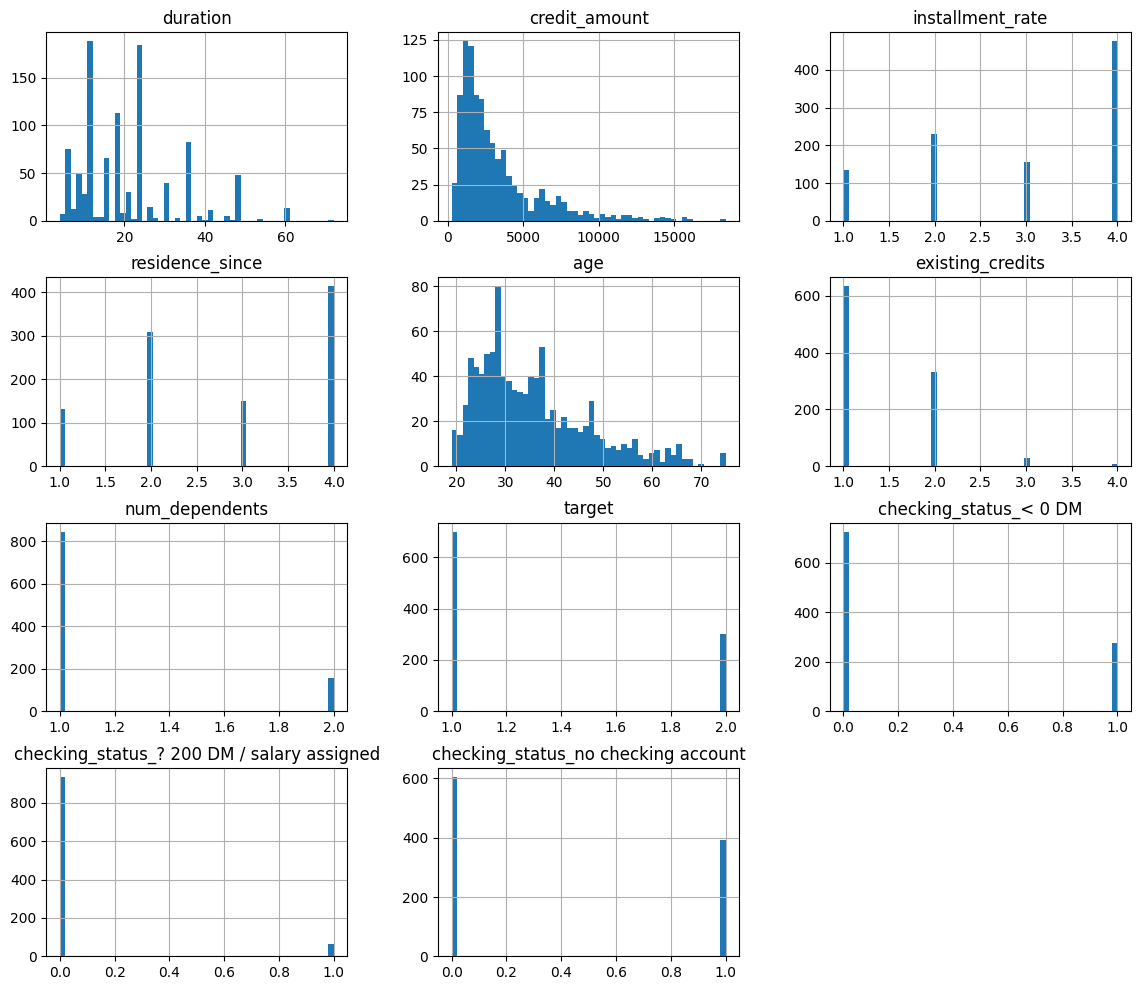

In [168]:
df.hist(bins=50,figsize=(14,12))
plt.show()

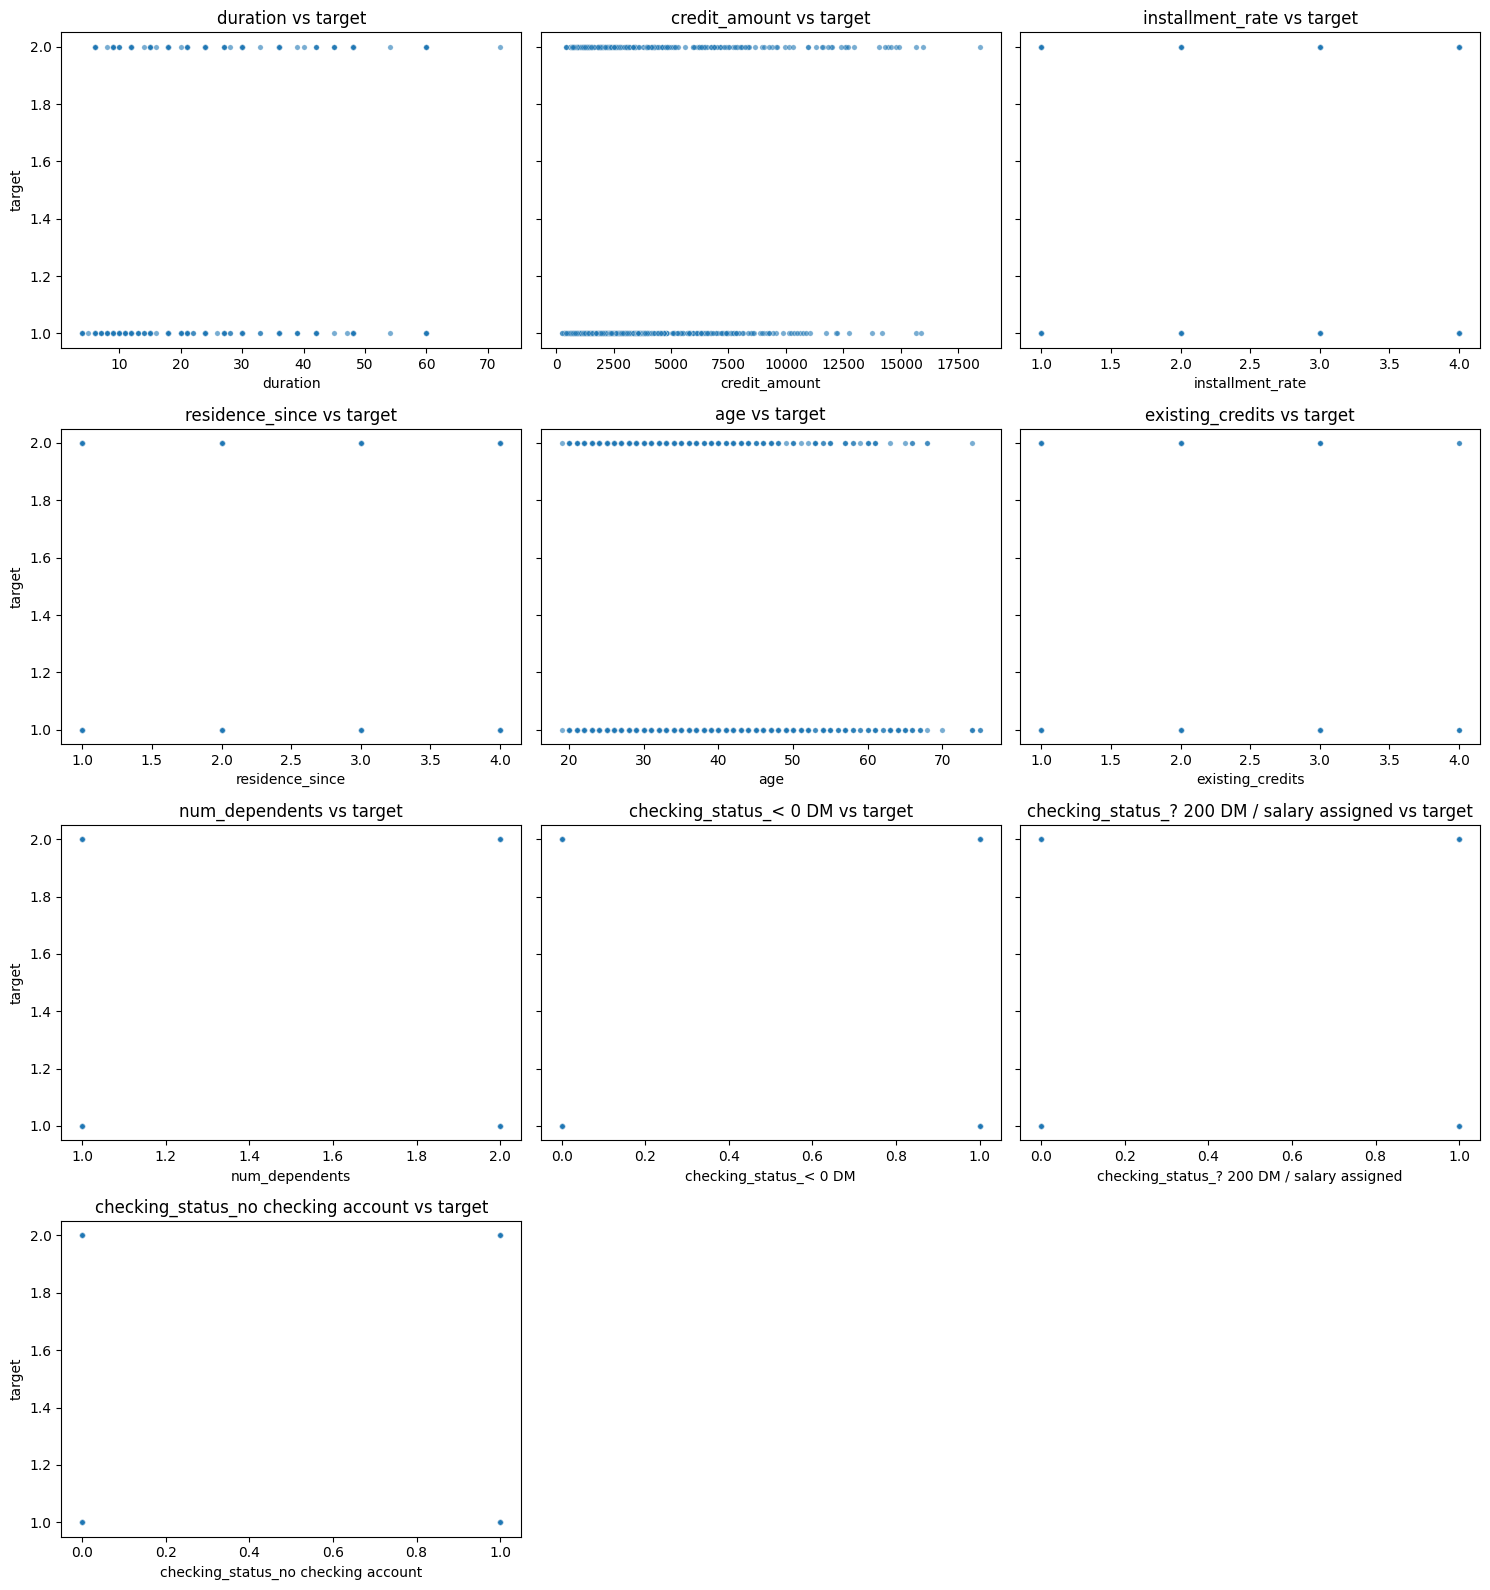

In [169]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

y = "target"  # tu variable objetivo en eje Y

# Tomar todas las numéricas excepto Y
x_cols = df.select_dtypes(include=['number']).columns.drop(y)

n = len(x_cols)
ncols = 3   # número de gráficos por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

# Quitar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

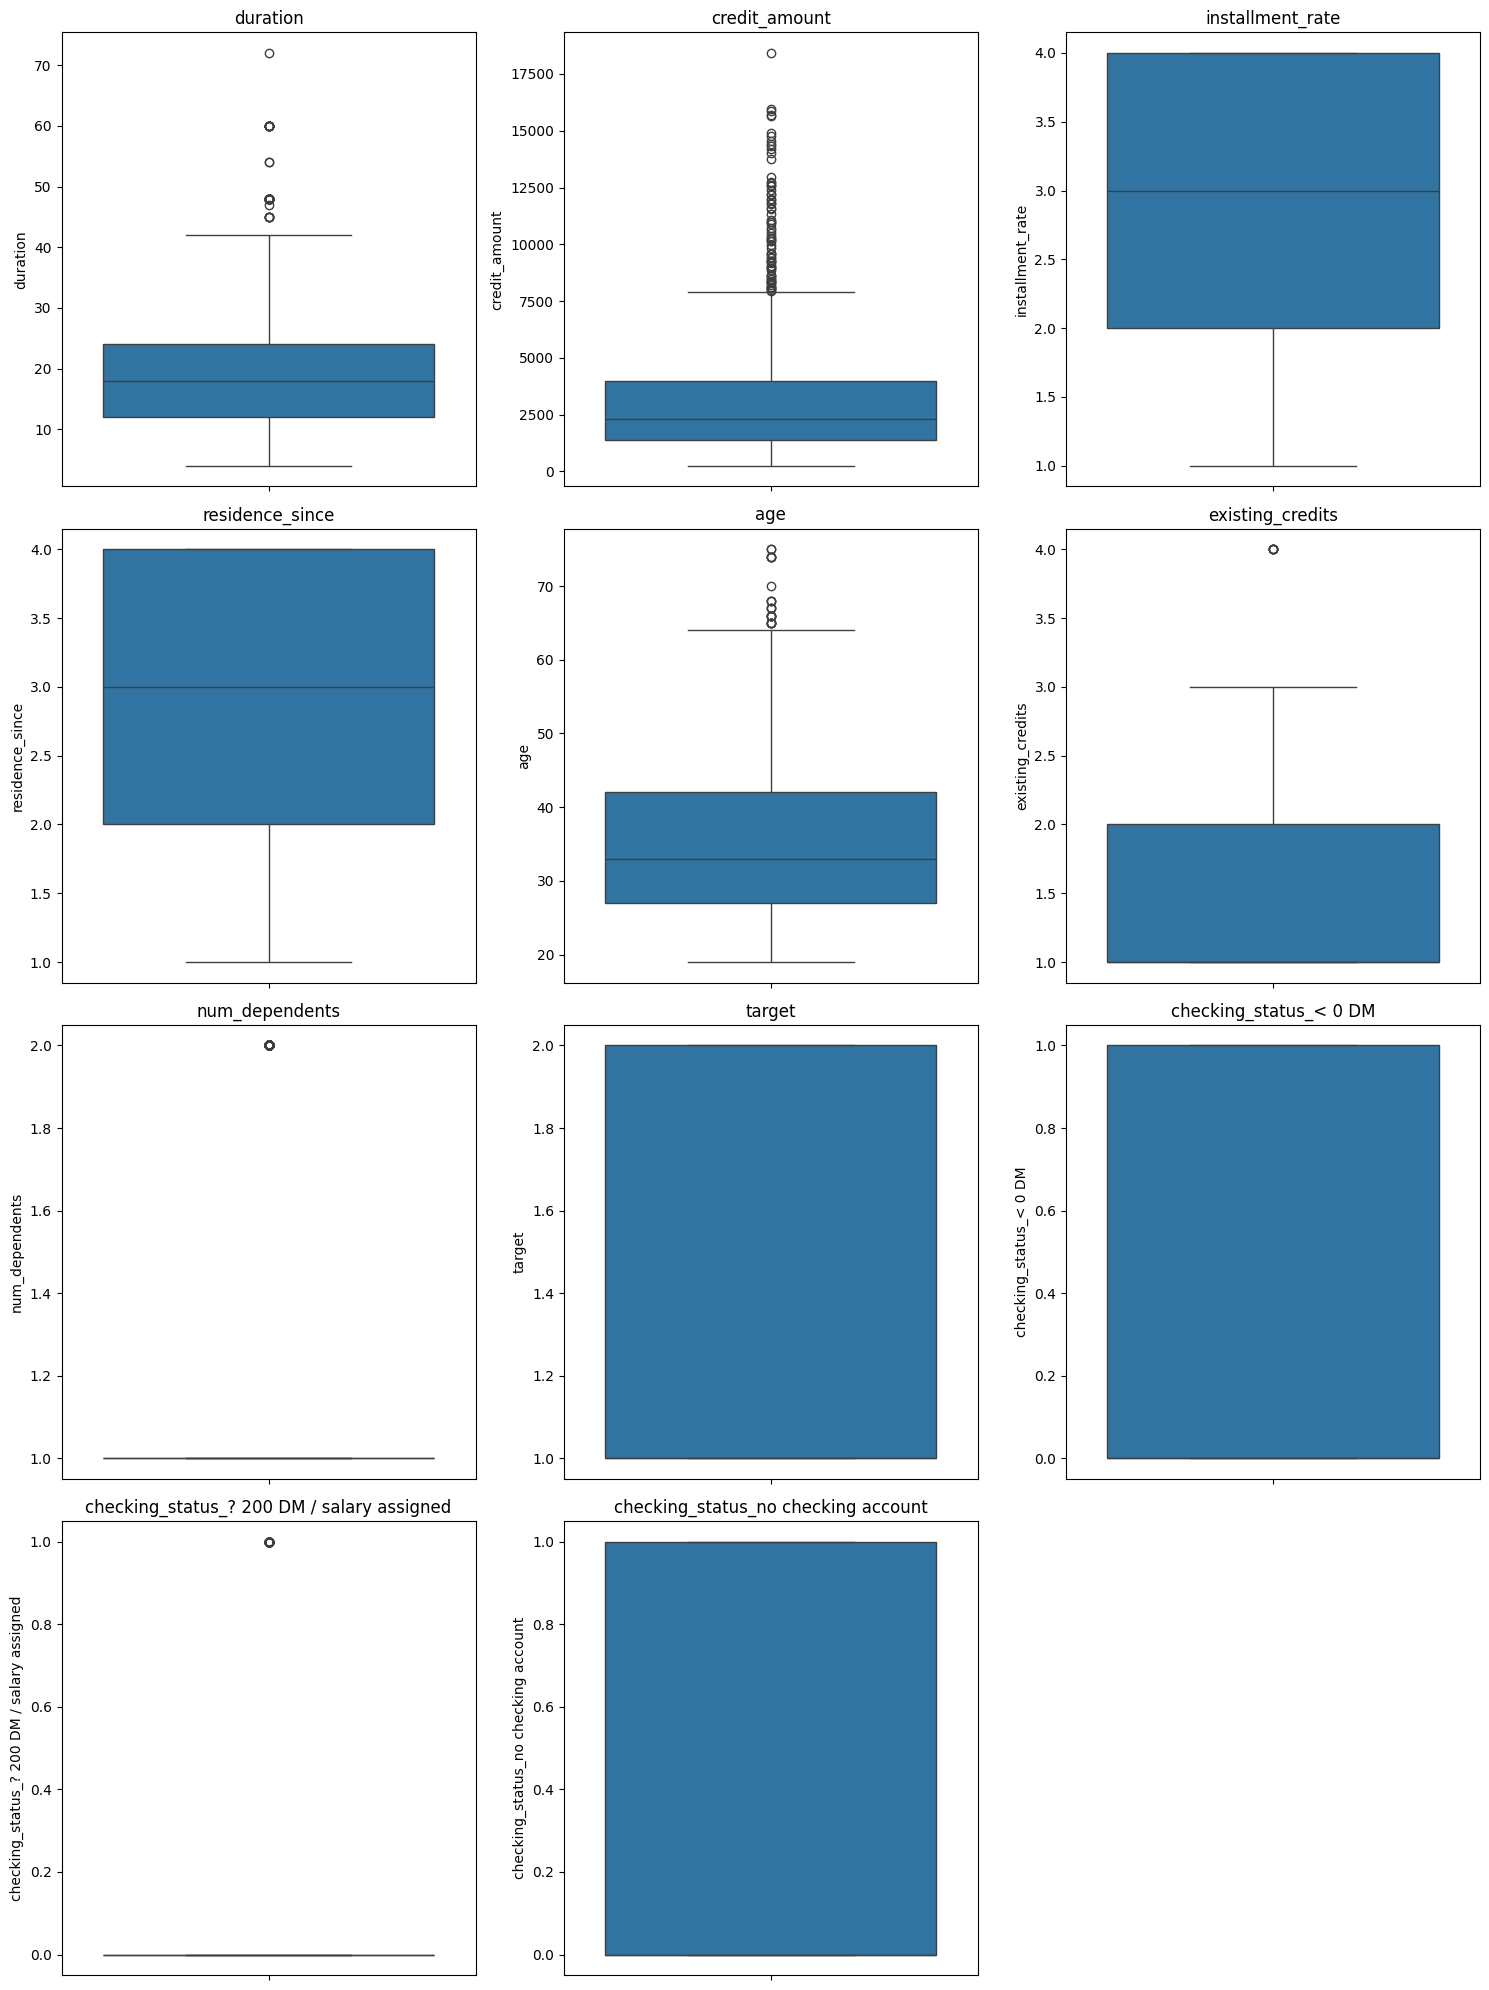

In [170]:
import math

num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

# Definir grid
ncols = 3   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [176]:
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='tch_rango', y=var, data=df, inner='box')
    plt.title(f"Distribución de {var} por rango_tch")
    plt.show()

NameError: name 'num_vars' is not defined

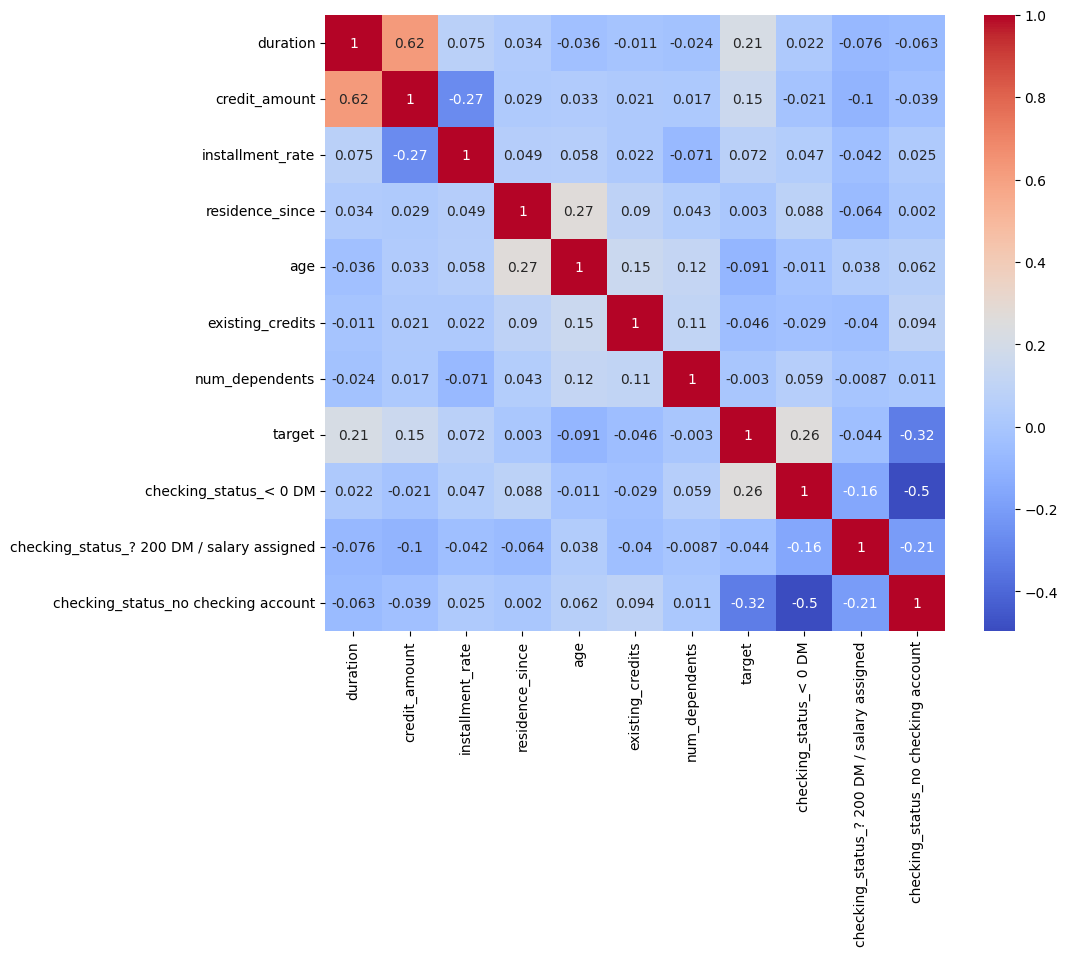

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

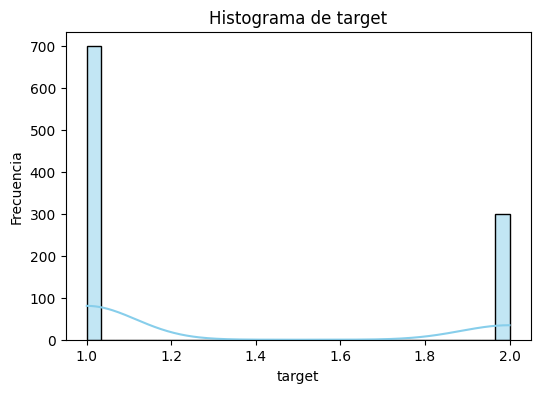

In [172]:
plt.figure(figsize=(6,4))
sns.histplot(df['target'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de target')
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.show()

In [173]:
### Seleccionamos como categóricas las variables checking status con checking_status_< 0 DM. como númericas, duration y credit amount aunque pareciera que están correlacionadas entre ellas

In [174]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[['duration']])  # estandarizada
y = df['target']

# Ahora puedes usar X_scaled en tu modelo
import statsmodels.api as sm
X_scaled = sm.add_constant(X_scaled)
modelo_1_TAH_Scaler = sm.OLS(y, X_scaled).fit()
print(modelo_1_TAH_Scaler.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     48.33
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           6.49e-12
Time:                        01:07:23   Log-Likelihood:                -614.97
No. Observations:                1000   AIC:                             1234.
Df Residuals:                     998   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3000      0.014     91.763      0.0

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Variables (X = numéricas, y = categórica)
X = df[['lluvias', 'mes', 'edad', 'vejez', 'cortes']]
y = df['target']

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo logístico (multinomial)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Reporte de métricas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Coeficientes
print("Coeficientes por clase:\n", log_reg.coef_)
print("Interceptos:\n", log_reg.intercept_)